In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
import matplotlib.patches as patches
import matplotlib.patheffects as PathEffects

In [3]:
plt.style.use('ggplot')
cc = plt.rcParams['axes.prop_cycle'].by_key()['color'] * 2

# Args

In [4]:
PLATFORM = "IONTORRENT"
EXP = "exp3"
MAPPING = 'KMA' # BLAST
BARCODE_SYSTEM = 'AKB' #'10x'
PRJ = "mapping"

## Input

In [5]:
kma_fil = ("/Volumes/tuba/herpov/tcr-pmhc-sc-project/data/" + EXP + "_MHC_" + PLATFORM +
           "/mapping/KMA-1t1/output/mapping.clean.gz")

## Output

## Load data

In [6]:
df = pd.read_csv(kma_fil)

In [7]:
df

,uncertainty,score,t_alignment_start,t_alignment_end,template_id,read_header,query_id,gem,credible_alignment,alignment_length,barcode,sample
0,15,37,88,137,A1064B288_sample,HBBAF:02644:01966 BX:Z:TTAGGACCAACGATCT-1,HBBAF:02644:01966,TTAGGACCAACGATCT-1,False,49,A1064B288,sample
1,15,37,88,137,A1064B288_sample,HBBAF:00780:01765 BX:Z:TTAGGACCAACGATCT-1,HBBAF:00780:01765,TTAGGACCAACGATCT-1,False,49,A1064B288,sample
2,1,98,0,114,A1064B288_sample,HBBAF:03518:01259 BX:Z:GCTGCAGGTACCGCTG-1,HBBAF:03518:01259,GCTGCAGGTACCGCTG-1,True,114,A1064B288,sample
3,1,101,0,129,A1064B288_sample,HBBAF:03366:00950 BX:Z:GCTGCAGGTACCGCTG-1,HBBAF:03366:00950,GCTGCAGGTACCGCTG-1,True,129,A1064B288,sample
4,1,92,0,105,A1064B288_sample,HBBAF:03285:01256 BX:Z:GCTGCAGGTACCGCTG-1,HBBAF:03285:01256,GCTGCAGGTACCGCTG-1,True,105,A1064B288,sample
...,...,...,...,...,...,...,...,...,...,...,...,...
260414,1,70,40,141,A4000B302_sample,HBBAF:00373:00554 BX:Z:CGCGTTTTCTAACGGT-1,HBBAF:00373:00554,CGCGTTTTCTAACGGT-1,True,101,A4000B302,sample
260415,1,72,6,101,A4000B302_sample,HBBAF:02522:03334 BX:Z:GGCAATTAGCCATCGC-1,HBBAF:02522:03334,GGCAATTAGCCATCGC-1,True,95,A4000B302,sample
260416,1,113,0,138,A4000B302_sample,HBBAF:02655:02122 BX:Z:ACTTTCAAGATCCGAG-1,HBBAF:02655:02122,ACTTTCAAGATCCGAG-1,True,138,A4000B302,sample
260417,1,116,0,141,A4000B302_sample,HBBAF:01027:02674 BX:Z:ACTTTCAAGATCCGAG-1,HBBAF:01027:02674,ACTTTCAAGATCCGAG-1,True,141,A4000B302,sample


# Main

## Uncertainty distribution

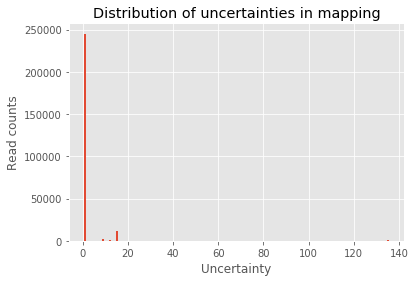

In [18]:
plt.bar(df.uncertainty.value_counts().index, df.uncertainty.value_counts().values)
plt.title("Distribution of uncertainties in mapping")
plt.xlabel('Uncertainty')
plt.ylabel('Read counts')
plt.show()

## Distribution of reads per template

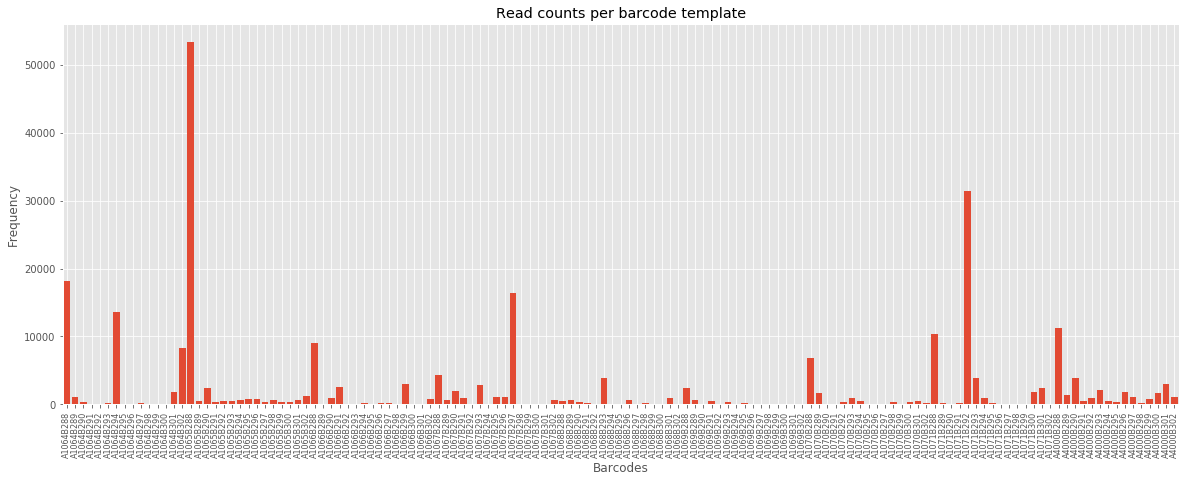

In [38]:
x = df.groupby('barcode').size().index
y = df.groupby('barcode').size().values
plt.figure(figsize=(20,7))
plt.bar(x,y)
plt.xlim(-0.5, len(x)-0.5)
plt.xticks(rotation=90, fontsize=8)
plt.xlabel("Barcode templates")
plt.ylabel("Read counts")
plt.title("Read counts per barcode template")
plt.show()

<BarContainer object of 8762 artists>

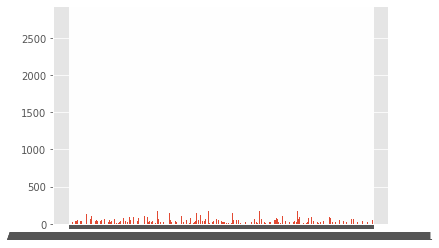

In [30]:
x = df.groupby(['gem']).query_id.unique().apply(len).index
y = df.groupby(['gem']).query_id.unique().apply(len).values
plt.bar(x,y)

In [ ]:
x = df.groupby('barcode').gem.size().index
y = df.groupby('barcode').gem.size().values
plt.figure(figsize=(20,7))
plt.bar(x,y)
plt.xlim(-0.5, len(x)-0.5)
plt.xticks(rotation=90, fontsize=8)
plt.xlabel("Barcode templates")
plt.ylabel("Read counts")
plt.title("Read counts per barcode template")
plt.show()

## Alignment

In [16]:
data_categories = {'expected_templates':{'TSO':(0, 13, cc[3]),
                                         'Primer_B':(13, 19, cc[0]),
                                         'N6':(32, 6, cc[4]),
                                         'Oligo_B':(38, 25, cc[2]),
                                         'Anneal':(63, 25, cc[1]),
                                         'Oligo_A':(88, 25, cc[2]),
                                         'N6-':(113, 6, cc[4]),
                                         'Primer_A':(119, 18, cc[0]),
                                         'ID':(137, 8, cc[5])}}

In [34]:
df.shape

(260419, 12)

In [8]:
df = df.head(n=3)

In [9]:
df['colors'] = df.uncertainty / df.uncertainty.max()

/Users/herpov/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
sorted(df.uncertainty.unique())

[1, 15]

In [11]:
df

,uncertainty,score,t_alignment_start,t_alignment_end,template_id,read_header,query_id,gem,credible_alignment,alignment_length,barcode,sample,colors
0,15,37,88,137,A1064B288_sample,HBBAF:02644:01966 BX:Z:TTAGGACCAACGATCT-1,HBBAF:02644:01966,TTAGGACCAACGATCT-1,False,49,A1064B288,sample,1.000000
1,15,37,88,137,A1064B288_sample,HBBAF:00780:01765 BX:Z:TTAGGACCAACGATCT-1,HBBAF:00780:01765,TTAGGACCAACGATCT-1,False,49,A1064B288,sample,1.000000
2,1,98,0,114,A1064B288_sample,HBBAF:03518:01259 BX:Z:GCTGCAGGTACCGCTG-1,HBBAF:03518:01259,GCTGCAGGTACCGCTG-1,True,114,A1064B288,sample,0.066667


In [12]:
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.viridis(np.linspace(0,1,2)))

In [13]:
cc2 = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [14]:
cc2

[array([0.267004, 0.004874, 0.329415, 1.      ]),
 array([0.993248, 0.906157, 0.143936, 1.      ])]

TSO (0, 13, '#777777')
Primer_B (13, 19, '#E24A33')
N6 (32, 6, '#FBC15E')
Oligo_B (38, 25, '#988ED5')
Anneal (63, 25, '#348ABD')
Oligo_A (88, 25, '#988ED5')
N6- (113, 6, '#FBC15E')
Primer_A (119, 18, '#E24A33')
ID (137, 8, '#8EBA42')


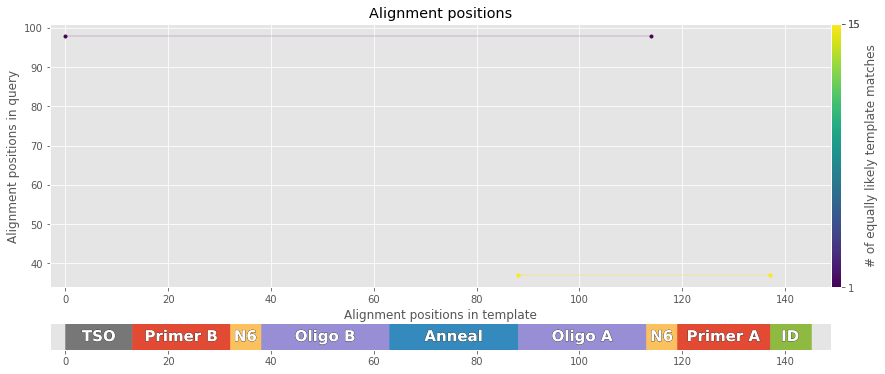

In [63]:
for data_category in data_categories:
    
    ################################################################################################################
    ###                                                PLOTTING                                                  ###
    ################################################################################################################
    

    # Plot
    title = "Alignment positions"
    # Set up the axes with gridspec
    fig = plt.figure(figsize=(14, 6))
    grid = plt.GridSpec(2, 1, hspace=0.25, height_ratios=[10,1])
    # Main
    main_ax = plt.subplot(grid[0, 0])
    
    for i, u in enumerate(sorted(df.uncertainty.unique())):
        main = plt.plot([df[df.uncertainty == u].t_alignment_start.to_list(), df[df.uncertainty == u].t_alignment_end.to_list()],
                        [df[df.uncertainty == u].score.to_list(),df[df.uncertainty == u].score.to_list()],
                        '.-', linewidth=0.2, c=cc2[i])
        #plt.scatter([], [], c=cc2[i], label="%i" %i)
    main = plt.xlim(-3,149) # Variable!
    main = plt.xlabel("Alignment positions in template")
    main = plt.ylabel("Alignment positions in query")
    main = plt.title(title)
    # Add colorbar
    sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=1, vmax=df.uncertainty.max()))
    cbaxes = fig.add_axes([0.9, 0.27, 0.01, 0.61]) #[x-pos,y-pos,width]
    cbar = plt.colorbar(sm, cax = cbaxes) #pad=-0.0005
    cbar.set_ticks(df.uncertainty.values)
    cbar.set_ticklabels(df.uncertainty.values)
    cbar.ax.set_ylabel('# of equally likely template matches', rotation=90) #270
    # Add legend
    #plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='No. matches', bbox_to_anchor=(1.005, 0.5), loc='center left') #, borderaxespad=0.
    # Subs
    subs_ax = plt.subplot(grid[1, 0], yticklabels=[], yticks=[], sharex=main_ax)
    # Add template design
    for k, v in data_categories[data_category].items():
        print(k,v)
        # Create a Rectangle patch
        rect = patches.Rectangle((v[0],0),v[1],1, fill=True, color=v[2]) #linewidth=1,edgecolor='r',facecolor='none'
        subs_ax.add_patch(rect)
        # Add text
        block = " ".join(k.split("_")).split("-")[0]
        txt = subs_ax.text(v[1]/2.0+v[0], 0.5, block, horizontalalignment='center', verticalalignment='center', color='white',
                           size=15, weight='heavy')
        txt.set_path_effects([PathEffects.withStroke(linewidth=0.5, foreground='black')])       

    #plt.savefig(FIG_DIR + "_".join(title.split(" ")) + "_" + data_category + ".png", bbox_inches='tight')
    plt.show()